# Proyecto Módulo 2 Volumen de un terreno

## Integrantes:
### Antonio Ortegón
### René González

# Problema:
## Cálculo de volúmenes de excavación en un terreno irregular

Para resolver este problema, se utilizará el método de integración de Montecarlo, cuyo objetivo es determinar el área a excavar. Este proceso requiere seguir una serie de pasos que se derivan de la investigación de campo:

1. **Modelo Digital del Terreno (MDT)**: Se genera un modelo digital utilizando datos recopilados por topógrafos, que pueden incluir información obtenida mediante GPS, Estaciones Totales, Drones o escáneres LiDAR.

2. **Definición del área de interés**: Es fundamental conocer las fronteras del terreno y los niveles correspondientes. Aunque este paso se puede realizar fácilmente en AUTOCAD, en este caso optaremos por un enfoque diferente.

3. **Cálculo de volúmenes**: Al calcular el volumen, se evaluará si cada punto se encuentra dentro del área de interés. Esto implica comparar la altura del terreno con la elevación deseada. Si un punto está por debajo de la superficie pero a la altura de excavación, se considerará para el cálculo del volumen a excavar.

4. **Aplicación del método de Montecarlo**: Este método se basa en la proporción de puntos que caen dentro del volumen de excavación, permitiendo identificar cuáles se encuentran dentro y cuáles fuera de la superficie a excavar.


### Objetivos

1. **Calcular de manera precisa el volumen a excavar.**
  
2. **Definir claramente el área de interés para la excavación.**

3. **Comparar las cotas del terreno con la altura prevista para la excavación.**

### Objetivos Específicos

1. **Utilizar modelos topográficos**: Recopilar y procesar datos topográficos con el fin de construir un Modelo Digital del Terreno (MDT) que refleje con exactitud las características del área de estudio.

2. **Aplicar el método de Montecarlo**: Evaluar la distribución de puntos en el terreno mediante el método de Montecarlo para determinar el área exacta a excavar, facilitando así el cálculo del volumen correspondiente.

3. **Verificar la precisión del MDT**: Asegurar que el modelo digital se ajusta adecuadamente a la realidad del terreno, lo cual es crucial para obtener resultados fiables en el cálculo de volúmenes.

4. **Desarrollar un plan de trabajo**: Establecer un cronograma y metodología para llevar a cabo la investigación de campo, asegurando una correcta recolección de datos y su posterior análisis.


### Diagrama

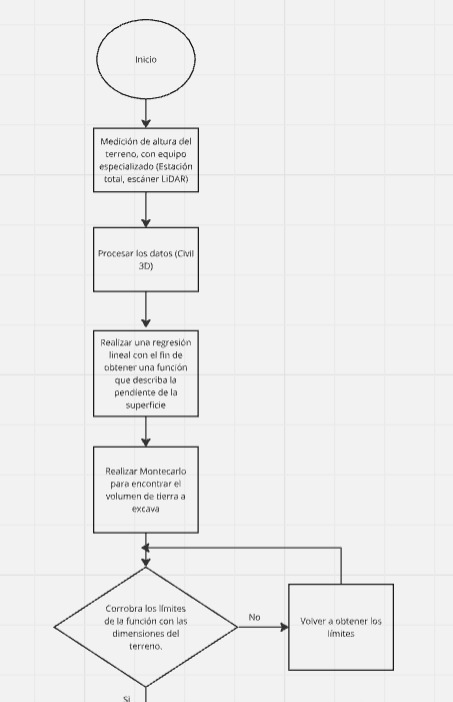

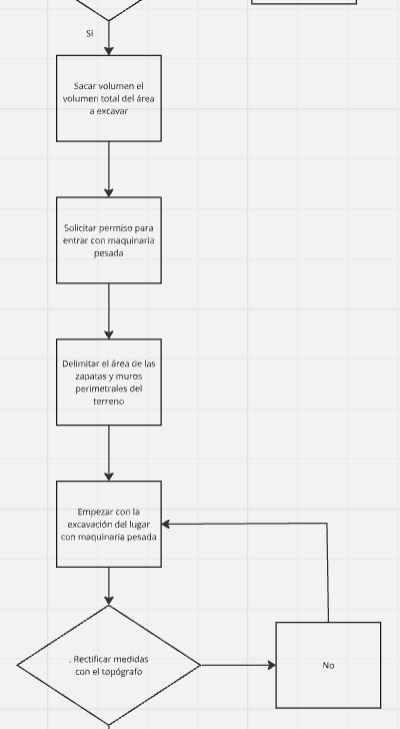

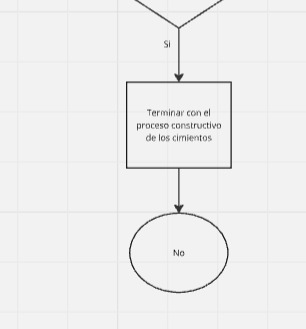

### 2.3 Modelo de Excavación

Para estimar el volumen de tierra a excavar en un terreno irregular, utilizamos un modelo basado en el método de Montecarlo. Este método genera puntos aleatorios dentro de un área definida y calcula cuántos de esos puntos están por debajo de la superficie del terreno, representando la tierra a remover.

**Funcionamiento del modelo:**

**Superficie del terreno:**

- Se define mediante una ecuación lineal $f(x,y)$ que relaciona la altura (z) con las coordenadas (x,y) del terreno.
- Generación de puntos: Se generan puntos aleatorios dentro de un cubo que encierra la zona de interés.

**Clasificación de puntos:**

Cada punto se clasifica como:
- Excavar: Si está por debajo de la superficie del terreno.
- Rellenar: Si está por encima de la superficie.
- Nivelar: Si está en la superficie.
- Cálculo del volumen: Se estima el volumen de excavación contando los puntos que caen dentro de la zona a excavar y relacionándolo con el volumen total del cubo.

**Limitaciones:**

- Precisión de la ecuación: La exactitud del resultado depende de lo bien que la ecuación represente la forma real del terreno.
- Número de puntos: A mayor cantidad de puntos, más preciso será el resultado, pero también tomará más tiempo calcular.
- Forma del terreno: El modelo funciona mejor con terrenos que pueden ser representados por una ecuación lineal simple.

**Modelo**

$$V≈A * (Pdentro/Ptotal)$$

- V = Volumen

  - V=(bx-ax)⋅(by-ay)⋅(bz-az)

- **Pdentro = Promedio Dentro:** Cada punto generado aleatoriamente que cae dentro de la región a excavar.

- **Ptotal = Promedio Total:** Cada punto generado aletoriamente

$${promedio\_dentro} = \frac{1}{N} \sum_{i=1}^{N} I(\text{region}(x_i, y_i, z_i))
$$

Donde:

- 𝑁 = es el número total de puntos.
- 𝐼 = es la función indicadora que vale 1 si su argumento es verdadero y 0 si es falso.
- $(x_i, y_i, z_i)$ son las coordenadas de los puntos en el espacio.

### Problemática:

Nuestro cliente desea construir su casa sobre en un terreno irregular, para ello nosotros como constructora hemos decidido realizar una plataforma que sirva para nivelar el terreno, no obstante, para poder lograr esto se debe de excavar una cantidad del terreno con el fin de poder regularizar lo más que se pueda el terreno. Sin embargo, las medidas que tiene el cliente de terreno son de 20x5m y el desnivel del terreno es de 15m y 30m. No obstante, tenemos como referencia una casa que se encuentra a sobre nivel del punto más bajo a 10m


### Función que describe el problema

$ 37.27 x - 1.82  y - 15.45 $



### Montecarlo:

In [12]:
def montecarlo3D(region, ax, bx, ay, by, az, bz, n):
    x=np.random.uniform(ax, bx, n)
    y=np.random.uniform(ay, by, n)
    z=np.random.uniform(az, bz, n)
    V=(bx-ax)*(by-ay)*(bz-az)
    excavacion=np.array([1 if region(px, py, pz )== 'blue' else 0 for px, py, pz in zip(x, y, z)])
    relleno = np.array([1 if region(px, py, pz) == 'red' else 0 for px, py, pz in zip(x, y, z)])
    volumen_excavacion=V*np.mean(excavacion)
    volumen_relleno=V*np.mean(relleno)
    return volumen_excavacion, volumen_relleno

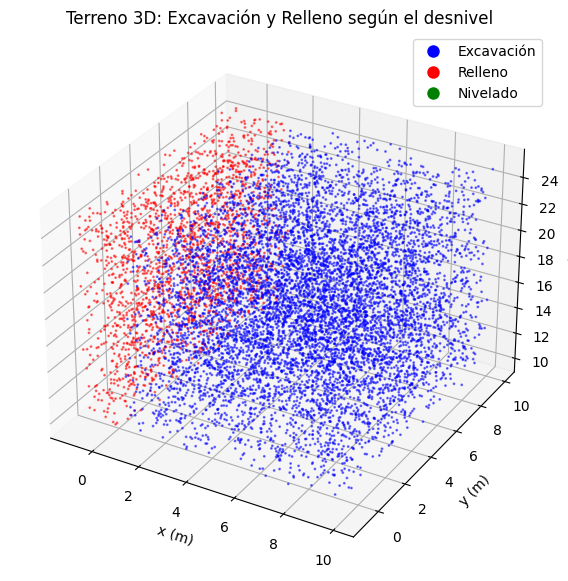

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

def f(x, y):
    return 37.273*x-1.818*y-19.091
def region(x, y, z):
    val=f(x, y)
    if z<val:
        return 'blue'  # Excavación
    elif z>val:
        return 'red'   # Relleno
    else:
        return 'green' # Nivelado
ax=-1
bx=10
ay=-1
by=10
az=10
refe=25
n = 10000
x = np.random.uniform(ax, bx, n)
y = np.random.uniform(ay, by, n)
z = np.random.uniform(az, refe, n)
colors = [region(px, py, pz) for px, py, pz in zip(x, y, z)]

fig = plt.figure(figsize=(10, 7))
ax3d = fig.add_subplot(111, projection='3d')
sc = ax3d.scatter(x, y, z, c=colors, s=1, alpha=0.5)
ax3d.set_title("Terreno 3D: Excavación y Relleno según el desnivel")
ax3d.set_xlabel("x (m)")
ax3d.set_ylabel("y (m)")
ax3d.set_zlabel("z (m)")
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Excavación', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Relleno', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nivelado', markerfacecolor='green', markersize=10)
]
ax3d.legend(handles=legend_elements, loc='upper right')
plt.show()



In [18]:
relleno, excavacion= montecarlo3D(region, ax, bx, ay, by, az, refe, n)
V = (bx - ax) * (by - ay) * (refe - az)
Crel_r = np.sqrt(np.abs((1 - relleno/ V) / (relleno / V)))
Crel_e = np.sqrt(np.abs((1 - excavacion/ V) / (excavacion/ V)))
Erel_r = np.log10(Crel_r) - np.log10(10)
Erel_e = np.log10(Crel_e) - np.log10(10)
Crel_e = np.log10(Crel_e) - np.log10(10)
tabla = pd.DataFrame(columns=['Voluemen', "Convergencia", 'Error'])
tabla.loc["Excavación"] = [relleno, Crel_e, Erel_e]
tabla.loc["Relleno"]=[excavacion, Crel_r, Erel_r]
tabla

,Voluemen,Convergencia,Error
Excavación,1455.8115,-0.696109,-0.696109
Relleno,359.1885,0.496717,-1.303891


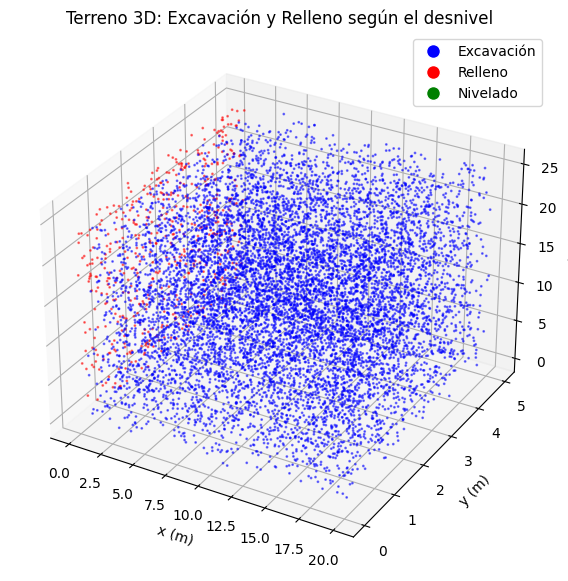

,Aproximación,Volumen,Convergencia,Error
Excavación,2373.5,2500.0,0.230861,-1.636649
Relleno,126.5,2500.0,4.331610,-0.363351


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Función para el método de Monte Carlo en 3D
def montecarlo3D(region, ax, bx, ay, by, az, bz, n):
    x = np.random.uniform(ax, bx, n)
    y = np.random.uniform(ay, by, n)
    z = np.random.uniform(az, bz, n)
    V = (bx - ax) * (by - ay) * (bz - az)

    # Determina cuántos puntos están en "blue" (excavación) y "red" (relleno)
    excavacion = np.array([1 if region(px, py, pz) == 'blue' else 0 for px, py, pz in zip(x, y, z)])
    relleno = np.array([1 if region(px, py, pz) == 'red' else 0 for px, py, pz in zip(x, y, z)])

    # Estimación del volumen de excavación y relleno
    volumen_excavacion = V * np.mean(excavacion)
    volumen_relleno = V * np.mean(relleno)

    return volumen_excavacion, volumen_relleno

# Función que define el desnivel del terreno
def f(x, y):
    return 37.273 * x - 1.818 * y - 19.091

# Función que clasifica los puntos como 'blue', 'red' o 'green'
def region(x, y, z):
    val = f(x, y)
    if z < val:
        return 'blue'  # Excavación
    elif z > val:
        return 'red'   # Relleno
    else:
        return 'green' # Nivelado

# Parámetros de los límites y número de puntos
ax, bx = 0, 20
ay, by = 0, 5
az, refe = 0, 25
n = 10000

# Generación de puntos en el volumen 3D y clasificación
x = np.random.uniform(ax, bx, n)
y = np.random.uniform(ay, by, n)
z = np.random.uniform(az, refe, n)
colors = [region(px, py, pz) for px, py, pz in zip(x, y, z)]

# Visualización 3D de los puntos de excavación, relleno, y nivelado
fig = plt.figure(figsize=(10, 7))
ax3d = fig.add_subplot(111, projection='3d')
sc = ax3d.scatter(x, y, z, c=colors, s=1, alpha=0.5)

# Configuración de los ejes
ax3d.set_title("Terreno 3D: Excavación y Relleno según el desnivel")
ax3d.set_xlabel("x (m)")
ax3d.set_ylabel("y (m)")
ax3d.set_zlabel("z (m)")

# Crear leyenda manual para los colores
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Excavación', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Relleno', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nivelado', markerfacecolor='green', markersize=10)
]
ax3d.legend(handles=legend_elements, loc='upper right')
plt.show()

# Cálculo del volumen estimado de excavación y relleno con Monte Carlo
volumen_excavacion, volumen_relleno = montecarlo3D(region, ax, bx, ay, by, az, refe, n)
V = (bx - ax) * (by - ay) * (refe - az)

# Calcular la convergencia relativa y el error relativo para el volumen de excavación
Crel_excavacion = np.sqrt(np.abs((1 - volumen_excavacion / V) / (volumen_excavacion / V)))
Erel_excavacion = np.log10(Crel_excavacion) - np.log10(10)

# Calcular la convergencia relativa y el error relativo para el volumen de relleno
Crel_relleno = np.sqrt(np.abs((1 - volumen_relleno / V) / (volumen_relleno / V)))
Erel_relleno = np.log10(Crel_relleno) - np.log10(10)

# Crear una tabla de resultados
tabla = pd.DataFrame(columns=['Aproximación', "Volumen", "Convergencia", 'Error'])
tabla.loc["Excavación"] = [volumen_excavacion, V, Crel_excavacion, Erel_excavacion]
tabla.loc["Relleno"] = [volumen_relleno, V, Crel_relleno, Erel_relleno]
tabla


### Volumen total

El volumen total del proyecto entre lo que es excavar y de relleno es de $1815m^3$

### Conclusiones

Lo que nos quedamos de este proyecto, es que, puede haber una aplicación muy interesante para la ingenería civil usando temas vistos en clase, como es el uso de montecarlo.

Pese a que se usaron datos falsos, debido a que no se tienen las herramientas necesarias para obtener los datos reales de la superficie de interese, resulto muy interesante ver el cómo mediante el uso de funciones que se aproximen a la realidad y un poco de imaginación se puede obtener en menos de 30 minutos algo, que en otros programas tardariamos 2 horas en pasar datos. Con esto queremos decir que sí se lograron los objetivos que eran demostrar el uso de esto en la ingenería civil y poder generar los puntos necesarios para poder obtener el volumen del área necesaria a excavar.

Referencias:

Dialnet. (n.d.). Estudio de la viabilidad técnica y económica de los modelos digitales del terreno en la ingeniería civil. Recuperado de https://dialnet.unirioja.es/servlet/tesis?codigo=236604

Calderon G, C. (2020). Cálculo de volumen por capas horizontales. Autodesk Forums. Recuperado de https://forums.autodesk.com/t5/civil-3d-espanol/calculo-de-volumen-por-capas-horizontales/td-p/8906616

Sig de Letras. (2016). ¿Qué es un modelo digital de terreno? Recuperado de https://sigdeletras.com/2016/que-es-un-modelo-digital-de-terreno/

Amazon Web Services. (n.d.). Simulación de Monte Carlo. Recuperado de https://aws.amazon.com/es/what-is/monte-carlo-simulation/#:~:text=Las%20simulaciones%20de%20Monte%20Carlo%20son%20una%20t%C3%A9cnica%20matem%C3%A1tica%20que,de%20una%20elecci%C3%B3n%20de%20acci%C3%B3n
